## The study of Antisemitism in The United Kingdom (2007 to 2021)
### The purpose of this analysis is to verify the relationship of the selected variables with the levels of antisemism observed throughout the defined period.

#### Used Variables:
##### "Year" = 180 Months from the beggining of 2007 until the end of 2021
##### "Incidents per 100k Jews" = Reported cases of verbal,physical & property damages against UK Jews
##### 'UK Google - "Israel"' = The Google Search for the word Israel from UK IPs on a indexed based varying from 0 to 100
##### "UK Unemployment Rate" = Unemployment Rate as measured by the UK Government
##### "UK Inflation Adjusted Average Salary" = UK Average Monthly Wage deflated by the measured inflation by the UK Government

###### About the Google Search: 
##### Israel is a lovely country with lots of technology companies and historical sites. However, as unfortunate as it can be, the majority of spikes in internet searches regarding Israel are derived from armed conflicts.

##### Relevant Links for Source Material
#####  https://cst.org.uk/data/file/f/f/Incidents%20Report%202021.1644318940.pdf
##### https://tradingeconomics.com/united-kingdom/unemployment-rate
##### https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/chaw/mm23
##### https://trends.google.com/trends/explore?date=2007-01-01%202021-12-31&geo=GB&q=israel

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [29]:
British_Antisemitism = pd.read_excel('Github_Eco_Antisemitism.xlsx',sheet_name='UK')
pd.set_option('display.max_rows', 10)
British_Antisemitism

,Year,Incidents per 100k Jews,"UK Google - ""Israel""",UK Unemployment Rate,UK Inflation Adjusted Average Salary
0,2007-01-01,11.301370,15,0.055,421.000000
1,2007-02-01,13.698630,15,0.055,422.853767
2,2007-03-01,12.328767,23,0.055,411.287671
3,2007-04-01,20.205479,14,0.055,405.359299
4,2007-05-01,12.328767,14,0.054,406.719690
...,...,...,...,...,...
175,2021-08-01,47.602740,16,0.045,381.689005
176,2021-09-01,51.369863,14,0.043,381.511342
177,2021-10-01,56.164384,15,0.042,380.584615
178,2021-11-01,45.890411,13,0.041,378.440980


In [3]:
British_Antisemitism.dtypes

Year                                    datetime64[ns]
Incidents per 100k Jews                        float64
UK Google - "Israel"                             int64
UK Unemployment Rate                           float64
UK Inflation Adjusted Average Salary           float64
dtype: object

In [4]:
British_Antisemitism = British_Antisemitism.rename(columns=str.lower) # Rename columns to lower letters
British_Antisemitism

,year,incidents per 100k jews,"uk google - ""israel""",uk unemployment rate,uk inflation adjusted average salary
0,2007-01-01,11.301370,15,0.055,421.000000
1,2007-02-01,13.698630,15,0.055,422.853767
2,2007-03-01,12.328767,23,0.055,411.287671
3,2007-04-01,20.205479,14,0.055,405.359299
4,2007-05-01,12.328767,14,0.054,406.719690
...,...,...,...,...,...
175,2021-08-01,47.602740,16,0.045,381.689005
176,2021-09-01,51.369863,14,0.043,381.511342
177,2021-10-01,56.164384,15,0.042,380.584615
178,2021-11-01,45.890411,13,0.041,378.440980


In [5]:
British_Antisemitism.isna().sum()

year                                    0
incidents per 100k jews                 0
uk google - "israel"                    0
uk unemployment rate                    0
uk inflation adjusted average salary    0
dtype: int64

In [6]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [7]:
x3 = British_Antisemitism['year']
x0 = British_Antisemitism['uk google - "israel"']
x1 = British_Antisemitism['uk unemployment rate']
x2 = British_Antisemitism['uk inflation adjusted average salary']
X = British_Antisemitism[['uk google - "israel"','uk unemployment rate', 'uk inflation adjusted average salary']]
y = British_Antisemitism['incidents per 100k jews']

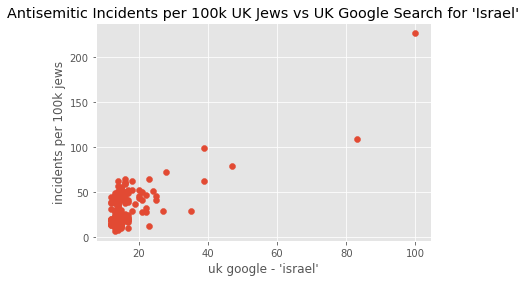

In [8]:
plt.scatter(x0,y)

plt.title("Antisemitic Incidents per 100k UK Jews vs UK Google Search for 'Israel'")
plt.xlabel("uk google - 'israel'")
plt.ylabel("incidents per 100k jews")


plt.show()

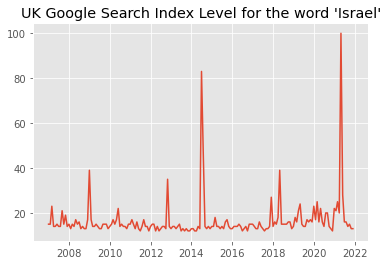

In [25]:
plt.plot(x3,x0)
plt.title("UK Google Search Index Level for the word 'Israel'")
plt.show()

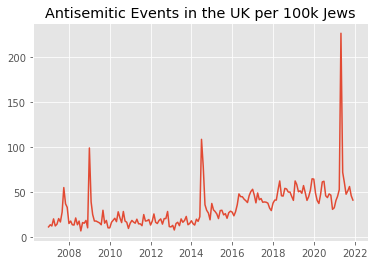

In [26]:
plt.plot(x3,y)
plt.title("Antisemitic Events in the UK per 100k Jews")
plt.show()

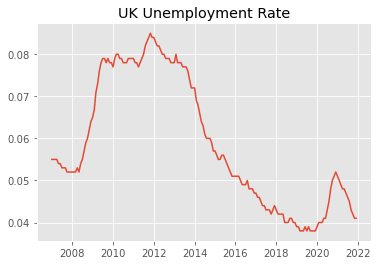

In [27]:
plt.plot(x3,x1)
plt.title("UK Unemployment Rate")
plt.show()

C:\Users\Shaul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shaul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shaul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


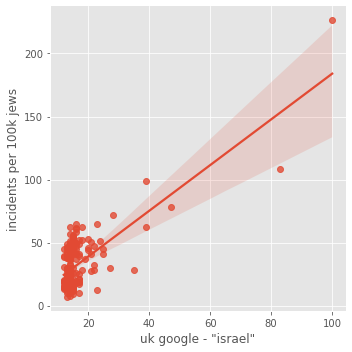

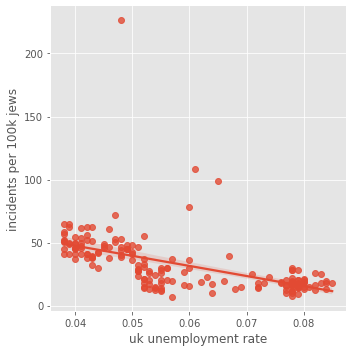

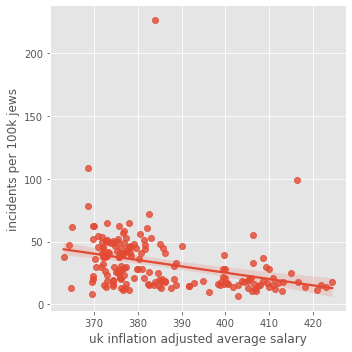

In [12]:
sns.lmplot('uk google - "israel"',"incidents per 100k jews",British_Antisemitism,fit_reg = True)
sns.lmplot("uk unemployment rate","incidents per 100k jews",British_Antisemitism,fit_reg = True)
sns.lmplot("uk inflation adjusted average salary","incidents per 100k jews",British_Antisemitism,fit_reg = True)


In [13]:
British_Antisemitism.describe()

,incidents per 100k jews,"uk google - ""israel""",uk unemployment rate,uk inflation adjusted average salary
count,180.000000,180.000000,180.00000,180.000000
mean,32.488584,16.472222,0.05875,385.524576
std,22.783196,9.306351,0.01538,14.889344
min,6.849315,12.000000,0.03800,363.100478
25%,16.780822,13.000000,0.04500,374.358745
50%,27.739726,14.000000,0.05400,379.428847
75%,44.948630,16.000000,0.07800,399.173061
max,226.369863,100.000000,0.08500,424.370861


In [14]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state = 1)

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
prediction = model.predict(X_test)

In [18]:
metrics.r2_score(y_test, prediction)

0.7205807551382912

<AxesSubplot:>

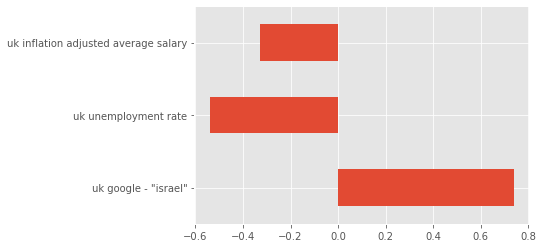

In [19]:
British_Antisemitism.corr()['incidents per 100k jews'].drop('incidents per 100k jews').plot(kind='barh')

##### Observations:
###### From 2007 to 2021 the United Kingdom had an overall decline on the unemployment rate
###### while the levels of antisemitism increased. That being the case, the two variables are
###### statistically correlated. It is crucial to remember that correlation does not mean
###### causation. For instance, the 2014 spike in antisemitic events occured during a decrease
###### in unemployment and the largest spike in antisemitic events happened in 2021 when
###### the increase in unemployment was not massive.

#### Conclusions:
##### The correlation and the massive correlated spikes seems to indicate that the main cause
##### that drives antisemitic activity in the UK is the series of events the occured in Israel
##### and its influence on UK citizens with latent hostility towards Jews. 
##### While one should be careful to declare that the old stereotype of blaming the Jews for
##### national economic struggles is a thing of the past, it seems like it plays a much 
##### smaller role nowadays. 